In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv("./Facebook_Ads_2.csv", encoding="latin1")

In [3]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
df.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(499, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time Spent on Site,499.0,32.920178,9.103455,5.0,26.425044,33.196067,39.114995,60.0
Salary,499.0,52896.992469,18989.183150,20.0,38888.117260,52840.913110,65837.288190,100000.0
Clicked,499.0,0.501002,0.500501,0.0,0.000000,1.000000,1.000000,1.0


In [9]:
df.describe(exclude="number").T

,count,unique,top,freq
Names,499,497,Seth,2
emails,499,499,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,1
Country,499,210,Israel,6


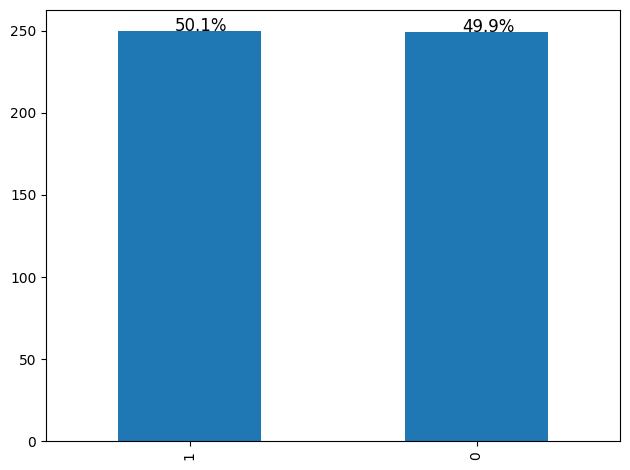

In [10]:
ax = df["Clicked"].value_counts().plot.bar()
for i in ax.patches:
    percentage = "{:.1f}%".format(100 * i.get_height() / len(df))
    x = i.get_x() + i.get_width() / 2 - 0.05
    y = i.get_y() + i.get_height()
    ax.annotate(percentage, (x, y), size=12)
plt.tight_layout()
plt.show()

In [11]:
df["Clicked"].value_counts()

1    250
0    249
Name: Clicked, dtype: int64

In [12]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6656\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Time Spent on Site,Salary,Clicked
Time Spent on Site,1.000000,0.388330,0.650781
Salary,0.388330,1.000000,0.654654
Clicked,0.650781,0.654654,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6656\533173135.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor="white", cmap="winter")


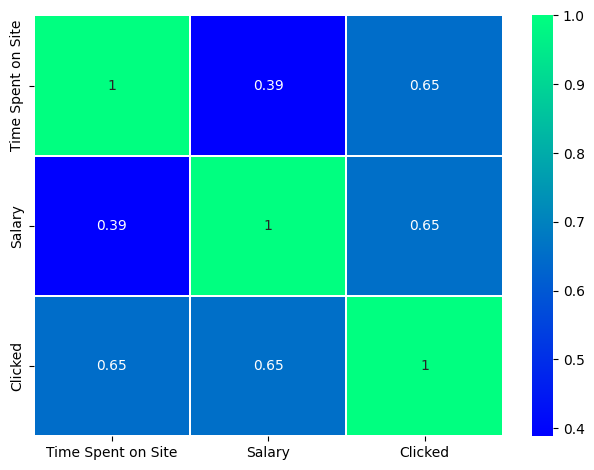

In [13]:
# Data Correlation
sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor="white", cmap="winter")
plt.tight_layout()
plt.show()

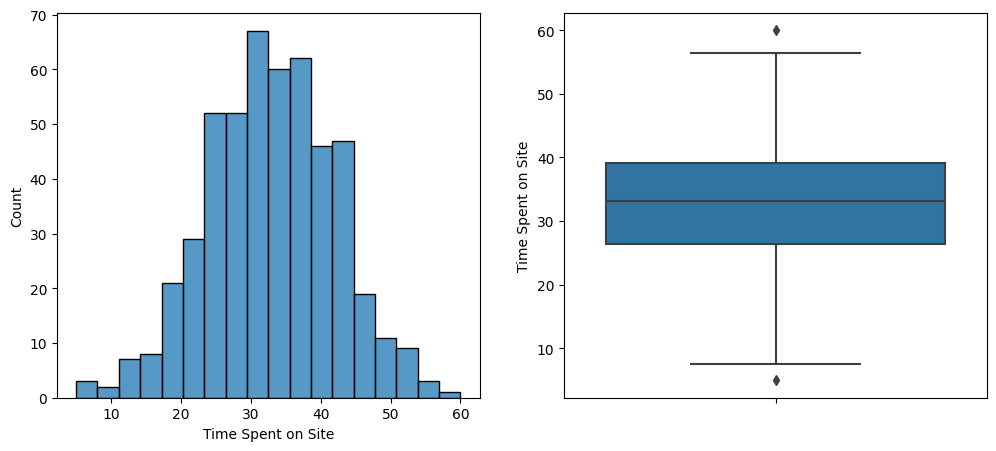

In [14]:
# Univariate Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df["Time Spent on Site"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Time Spent on Site"])
plt.show()

- Data minimal berada di angka 5 dan data terbesar berada di angka 60
- Data terbanyak berada di sekitar angka 30
- Data memiliki low outlier dan high outlier
- Interkuartil data berada di sekitar 20an sampai 30an

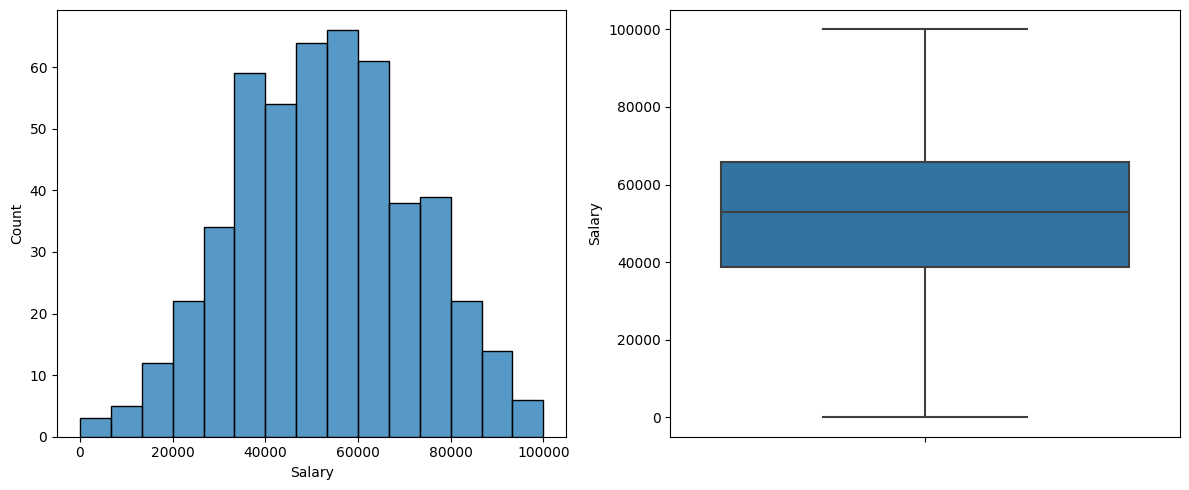

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df["Salary"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Salary"])
plt.tight_layout()
plt.show()

- Pengguna memiliki pendapatan minimal 20 dan pendapatan maksimal 100000 dengan pendapatan terbanyak berada di sekitar 50 ribu sampai 60 ribu
- Data Salary tidak memiliki outlier
- Interkuartil data berada diantara 39 ribu sampai sekitar 60an ribu

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6656\3748008426.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Time Spent on Site", y="Salary", ci=None)


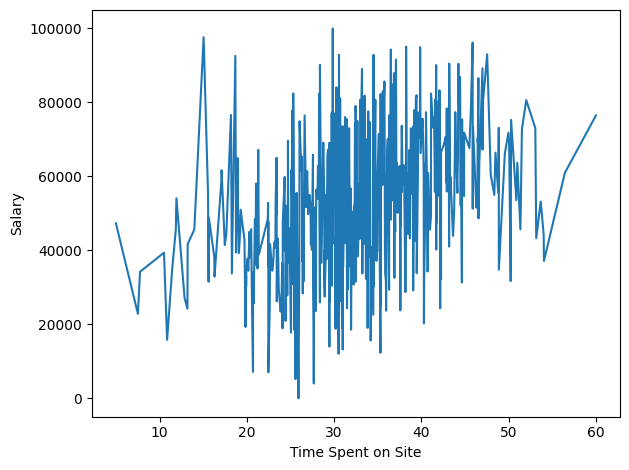

In [16]:
# Bivariate Analysis Time vs Salary
sns.lineplot(data=df, x="Time Spent on Site", y="Salary", ci=None)
plt.tight_layout()
plt.show()

- Pengguna yang hanya menghabiskan waktu paling sedikit memiliki pendapatan diatas 40 ribu
- Beberapa pengguna yang menghabiskan waktu di antara 20 - 30 memiliki pendapatan yang sangat kecil yaitu dibawah 20 ribu
- Pengguna yang menghabiskan waktu paling lama di suatu situs, memiliki pendapatan yang lumayan besar yaitu diatas 60 ribu

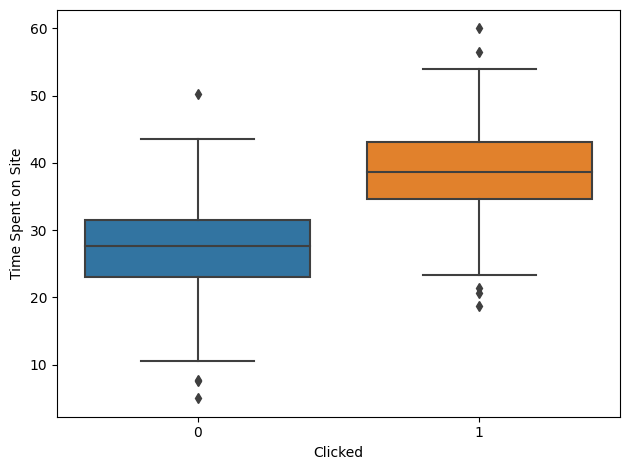

In [17]:
# Bivariate Analysis Time vs Clicked
sns.boxplot(data=df, x="Clicked", y="Time Spent on Site")
plt.tight_layout()
plt.show()

- Pengguna yang tidak melakukan click hanya menghabiskan sedikit waktu dibanding pengguna yang melakukan click
- Pengguna yang melakukan click menghabiskan waktu cenderung lebih besar dibanding pengguna yang tidak melakukan click
- Data pengguna yang tidak melakukan click terdapat 1 high outlier dan 2 low outlier
- Data pengguna yang melakukan click terdapat 2 high outlier dan 3 low outlier
- Interkuartil pengguna yang tidak melakukan click antara 20an sampai 30an
- Interkuartil pengguna yang melakukan click antara 30an sampai 40an

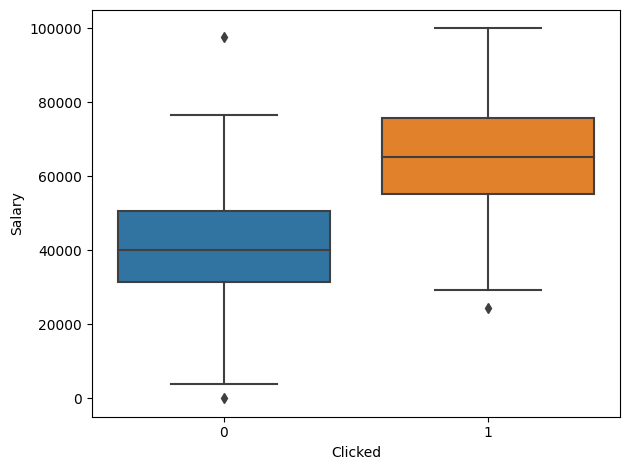

In [18]:
# Bivariate Analysis Salary vs Clicked
sns.boxplot(data=df, x="Clicked", y="Salary")
plt.tight_layout()
plt.show()

- Pengguna yang tidak melakukan click cenderung memiliki pendapatan yang lebih kecil dibanding pengguna yang melakukan click
- Data pengguna yang tidak melakukan click terdapat 1 high outlier dan 1 low outlier
- Data pengguna yang melakukan click terdapat 1 low outlier
- Hanya ada 1 pengguna yang memiliki pendapatan paling tinggi tetapi tidak melakukan click
- Interkuartil pengguna yang tidak melakukan click antara 25 ribu sampai 45 ribu
- Interkuartil pengguna yang melakukan click antara 57 ribu sampai 67 ribu

In [19]:
df.drop(["Names", "emails"], axis=1, inplace=True)


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])
print(df.head())

   Country  Time Spent on Site       Salary  Clicked
0       27           25.649648  55330.06006        0
1       17           32.456107  79049.07674        1
2        1           20.945978  41098.60826        0
3       41           54.039325  37143.35536        1
4       26           34.249729  37355.11276        0


In [21]:
X = df.drop("Clicked", axis=1).values
y = df["Clicked"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(399, 3) (100, 3) (399,) (100,)


In [22]:
log = LogisticRegression().fit(X_train, y_train)


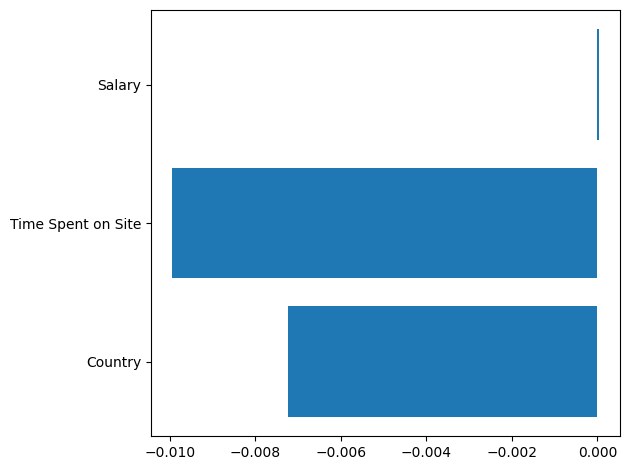

In [23]:
plt.barh(df.columns[:-1], log.coef_.ravel())
plt.tight_layout()
plt.show()

- Coefficient antar variabel dependen dan variabel indenpenden memiliki coefficient negatif

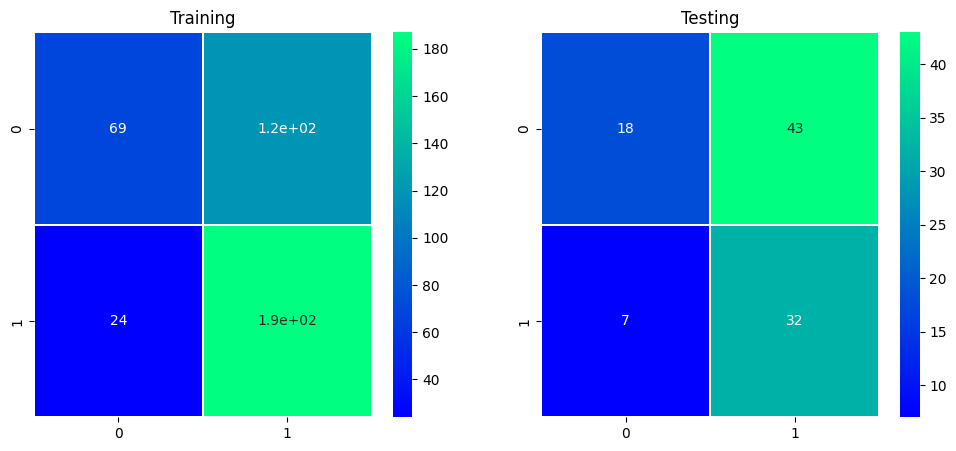

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_train, log.predict(X_train)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, log.predict(X_test)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [25]:
print("Training\n", classification_report(y_train, log.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       0.74      0.37      0.49       188
           1       0.61      0.89      0.72       211

    accuracy                           0.64       399
   macro avg       0.68      0.63      0.61       399
weighted avg       0.67      0.64      0.61       399



In [26]:
print("Testing\n", classification_report(y_test, log.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.72      0.30      0.42        61
           1       0.43      0.82      0.56        39

    accuracy                           0.50       100
   macro avg       0.57      0.56      0.49       100
weighted avg       0.61      0.50      0.47       100



- Training dan Testing memiliki performance yang buruk
- Mencari parameter terbaik dengan RandomizedSearchCV

In [27]:
log_params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "dual": [True, False],
    "C": np.linspace(0.0001, 10, 500),
    "fit_intercept": [True, False],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"],
    "verbose": np.arange(11),
    "warm_start": [True, False],
    "random_state": [0, 42, 101]
}

In [28]:
search_log = RandomizedSearchCV(log, log_params, random_state=42)
search_log.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.01398798e-02, 4.01797595e-02, 6.02196393e-02,
       8.02595190e-02, 1.00299399e-01, 1.20339279e-01, 1.40379158e-01,
       1.60419038e-01, 1.80458918e-01, 2.00498798e-01, 2.20538677e-01,
       2.40578557e-01, 2.60618437e-01, 2.80658317e-01, 3.00698196e-01,
       3.20738076e-01, 3.40777956e-0...
       9.93988036e+00, 9.95992024e+00, 9.97996012e+00, 1.00000000e+01]),
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'random_state': [0, 42, 101],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga'],
                                        'verbose': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'warm_start': [True, False]},
                   random_state=42)

In [29]:
search_log.best_score_

0.9148417721518987

In [30]:
log = search_log.best_estimator_
log.fit(X_train, y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=7.795613226452906, penalty=None, random_state=0,
                   solver='newton-cg', verbose=2, warm_start=True)

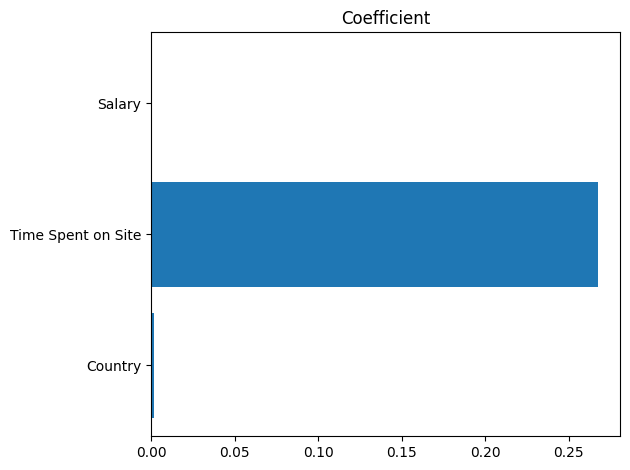

In [31]:
plt.barh(df.columns[:-1], log.coef_.ravel())
plt.title("Coefficient")
plt.tight_layout()
plt.show()

Model terbaik sudah didapatkan tetapi model memiliki coefficient yang kecil terhadap country bahkan variabel salary dikatakan tidak memiliki hubungan sama sekali dengan pengguna yang melakukan Clicked. Namun, model memiliki coefficient yang sangat tinggi pada pengguna yang menghabiskan waktunya pada situs tersebut.

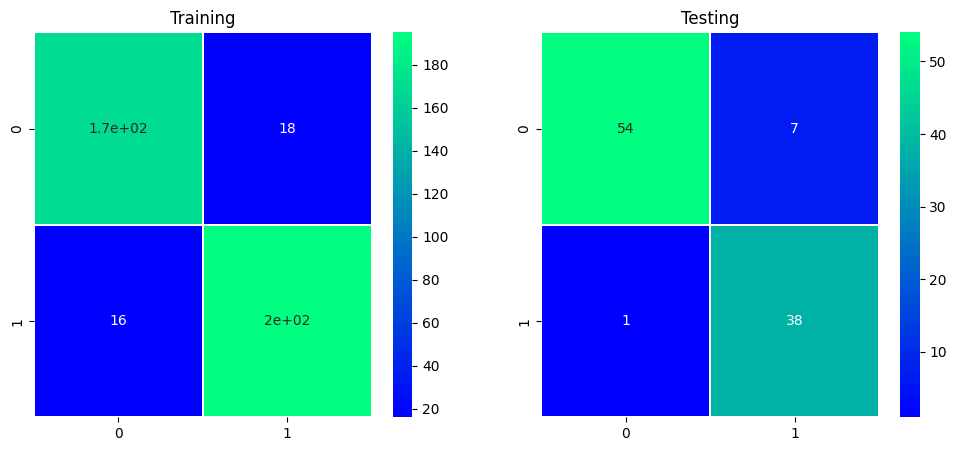

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_train, log.predict(X_train)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, log.predict(X_test)), annot=True, linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [33]:
print("Training\n", classification_report(y_train, log.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       188
           1       0.92      0.92      0.92       211

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



In [34]:
print("Testing\n", classification_report(y_test, log.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100

